In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [55]:
df=pd.read_excel('iris (3).xls')

In [56]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# pre-processing


In [4]:
df.shape

(150, 5)

In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

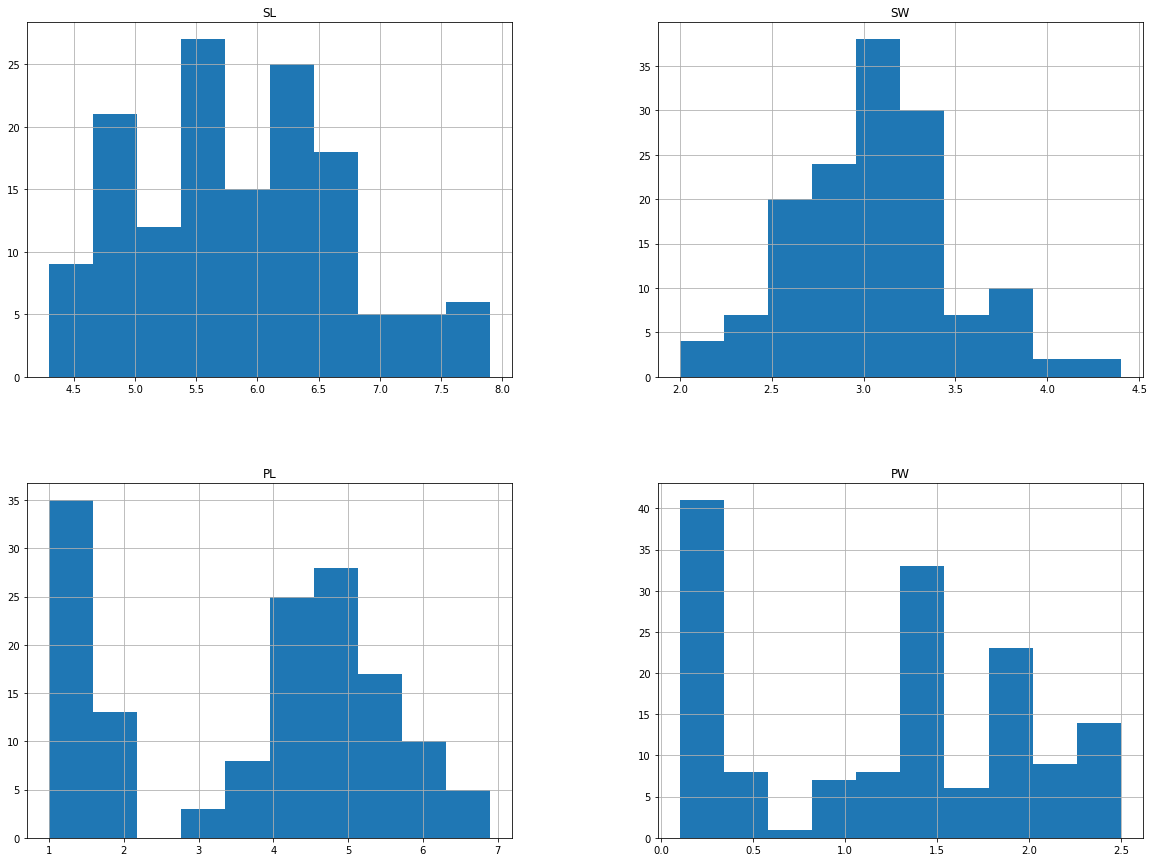

In [9]:
fraqgraph=df.select_dtypes(include=['float'])
fraqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
#Display columns
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [14]:
#To fill wanted columns
df['SL']=df['SL'].fillna(df['SL'].median())
df['SW']=df['SW'].fillna(df['SW'].median())
df['PL']=df['PL'].fillna(df['PL'].median())

In [57]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [6]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
df=pd.get_dummies(df)

In [64]:
df.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,NaN,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

# Decision Tree Algorithm

In [34]:
#Just trying to explore some new feature using the given data...

df['Sepal_diff'] = df['SL']- df['SW']
df['petal_diff'] = df['PL']- df['PW']

df['Sepal_petal_len_wid_diff'] = df['SL'] - df['PW']
df['Sepal_petal_wid_len_diff'] = df['SW'] - df['PL']


In [35]:
X = df[['SL', 'SW', 'PL', 'PW',
             'Sepal_diff', 'petal_diff', 'Sepal_petal_len_wid_diff',
             'Sepal_petal_wid_len_diff']]

In [65]:
y = df['Classification_Iris-setosa']

In [37]:
y.value_counts()


0    100
1     50
Name: Classification_Iris-setosa, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split



encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [40]:
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
# split the dataset for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.30, random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 8)
(105,)
(45, 8)
(45,)


In [43]:

#spliting data into validation train and validation test

Xt, Xcv, Yt, Ycv = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [44]:
# train the decision model

DecisionTree_clf = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=3)
DecisionTree_clf.fit(Xt, Yt)


DecisionTreeClassifier(max_depth=5, min_samples_split=3)

[Text(167.4, 163.07999999999998, 'X[3] <= 0.8\ngini = 0.435\nsamples = 94\nvalue = [64, 30]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 64\nvalue = [64, 0]')]

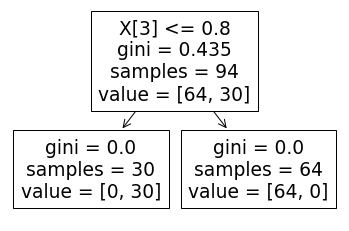

In [45]:
# visualize the result

tree.plot_tree(DecisionTree_clf)

# Random Forest Algorithm

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [52]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[26,  0],
       [ 0, 19]], dtype=int64)

In [54]:
from sklearn import metrics #for checking the model accuracy
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Random forest is: 1.0
